# Практика 8
Проведите полный анализ данного датасета

Постройте ROC -кривые

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

df = pd.read_csv('contract.csv')
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [2]:
df.info() # типы столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB


In [3]:
df.isna().sum() # проверка на пустые значения

customerID          0
BeginDate           0
EndDate             0
Type                0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
dtype: int64

In [4]:
df['BeginDate'] = pd.to_datetime(df['BeginDate'])
df['EndDate'] = df['EndDate'].replace('No', np.nan)
df['EndDate'] = pd.to_datetime(df['EndDate'])
df['BeginYear'] = df['BeginDate'].dt.year
df['BeginMonth'] = df['BeginDate'].dt.month
df['BeginDay'] = df['BeginDate'].dt.day
df['EndYear'] = df['EndDate'].dt.year
df['EndMonth'] = df['EndDate'].dt.month
df['EndDay'] = df['EndDate'].dt.day
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,BeginYear,BeginMonth,BeginDay,EndYear,EndMonth,EndDay
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,2020,1,1,NaN,NaN,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.5,2017,4,1,NaN,NaN,NaN
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,2019,10,1,2019.0,12.0,1.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,2016,5,1,NaN,NaN,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,2019,9,1,2019.0,11.0,1.0


## Распределение MonthlyCharges

C:\Users\User\AppData\Local\Temp\ipykernel_31276\3579429423.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['MonthlyCharges'], hist=True, kde=True,
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


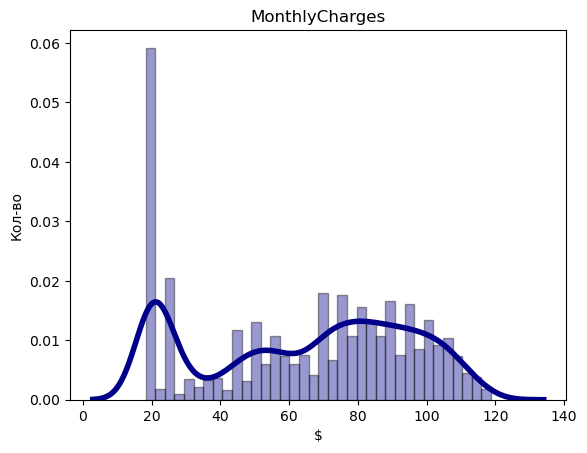

In [5]:
sns.distplot(df['MonthlyCharges'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
# Add labels
plt.title('MonthlyCharges')
plt.xlabel('$')
plt.ylabel('Кол-во')

plt.show()

## Распределение TotalCharges

In [6]:
def convert_column_to_float(df, column_name):
    try:
        df[column_name] = df[column_name].astype(float)
    except ValueError:
        # Если в столбце есть некорректные данные, которые не удается преобразовать
        df[column_name] = pd.to_numeric(df[column_name], errors='coerce')  # Ошибочные значения станут NaN
    return df

# Использование функции
df = convert_column_to_float(df, 'TotalCharges')

C:\Users\User\AppData\Local\Temp\ipykernel_31276\3518537081.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalCharges'], hist=True, kde=True,
D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


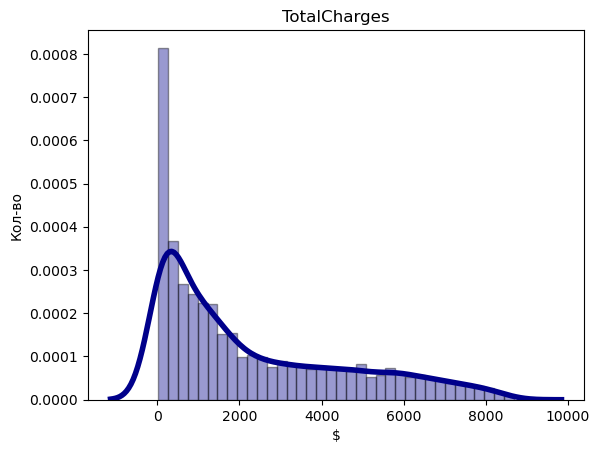

In [7]:
cols_to_drop = df.columns[df.columns.str.contains(" ")]
df.drop(cols_to_drop, axis=1, inplace=True)

for i in range(len(df['TotalCharges'])):
    if df['TotalCharges'][i] == ' ':
        df = df.drop(index=[i])

sns.distplot(df['TotalCharges'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.title('TotalCharges')
plt.xlabel('$')
plt.ylabel('Кол-во')

plt.show()

## Тип и Метод платежа

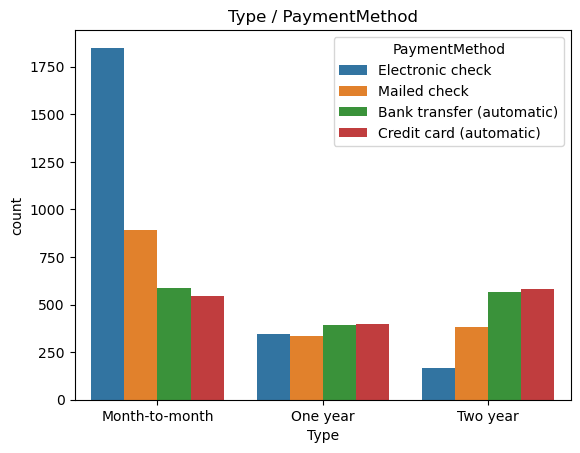

In [8]:
sns.countplot(df, x="Type", hue="PaymentMethod")
plt.title("Type / PaymentMethod")
plt.show()

## Бумажный/Безбумажный расчет

<Axes: xlabel='PaperlessBilling', ylabel='count'>

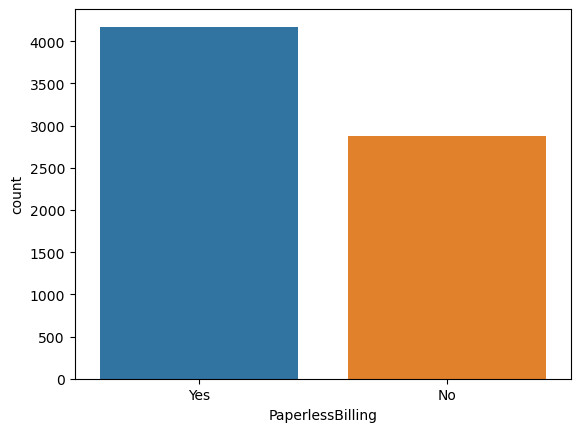

In [9]:
sns.countplot(df, x="PaperlessBilling")

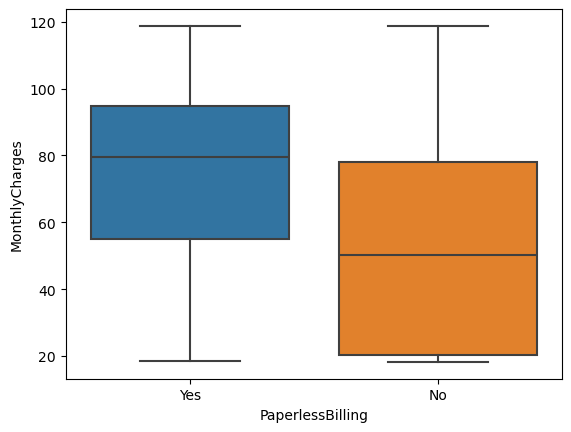

In [10]:
sns.boxplot(data=df, x="PaperlessBilling", y="MonthlyCharges")
plt.show()

In [11]:
print("Уникальных покупателей: ",len(df["customerID"].unique()))

Уникальных покупателей:  7043


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customerID        7043 non-null   object        
 1   BeginDate         7043 non-null   datetime64[ns]
 2   EndDate           1869 non-null   datetime64[ns]
 3   Type              7043 non-null   object        
 4   PaperlessBilling  7043 non-null   object        
 5   PaymentMethod     7043 non-null   object        
 6   MonthlyCharges    7043 non-null   float64       
 7   TotalCharges      7032 non-null   float64       
 8   BeginYear         7043 non-null   int32         
 9   BeginMonth        7043 non-null   int32         
 10  BeginDay          7043 non-null   int32         
 11  EndYear           1869 non-null   float64       
 12  EndMonth          1869 non-null   float64       
 13  EndDay            1869 non-null   float64       
dtypes: datetime64[ns](2), fl

In [13]:
df.isna().sum()

customerID             0
BeginDate              0
EndDate             5174
Type                   0
PaperlessBilling       0
PaymentMethod          0
MonthlyCharges         0
TotalCharges          11
BeginYear              0
BeginMonth             0
BeginDay               0
EndYear             5174
EndMonth            5174
EndDay              5174
dtype: int64

In [14]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# KNN / ROC кривая

### Угадывание PaperlessBilling

In [15]:
df.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,BeginYear,BeginMonth,BeginDay,EndYear,EndMonth,EndDay
0,7590-VHVEG,2020-01-01,NaT,Month-to-month,Yes,Electronic check,29.85,29.85,2020,1,1,NaN,NaN,NaN
1,5575-GNVDE,2017-04-01,NaT,One year,No,Mailed check,56.95,1889.50,2017,4,1,NaN,NaN,NaN
2,3668-QPYBK,2019-10-01,2019-12-01,Month-to-month,Yes,Mailed check,53.85,108.15,2019,10,1,2019.0,12.0,1.0
3,7795-CFOCW,2016-05-01,NaT,One year,No,Bank transfer (automatic),42.30,1840.75,2016,5,1,NaN,NaN,NaN
4,9237-HQITU,2019-09-01,2019-11-01,Month-to-month,Yes,Electronic check,70.70,151.65,2019,9,1,2019.0,11.0,1.0


In [16]:
from sklearn.preprocessing import LabelBinarizer

one_hot = pd.get_dummies(df['PaymentMethod'])
new_df = df.copy()
new_df = new_df.drop('PaymentMethod', axis = 1)
scale_mapper = {'Month-to-month':1, 'One year':2, 'Two year':3}
new_df['Type'] = new_df['Type'].replace(scale_mapper)
new_df = new_df.join(one_hot)

labelBin = LabelBinarizer()
new_df['PaperlessBilling'] = labelBin.fit_transform(df['PaperlessBilling'])
new_df

,customerID,BeginDate,EndDate,Type,PaperlessBilling,MonthlyCharges,TotalCharges,BeginYear,BeginMonth,BeginDay,EndYear,EndMonth,EndDay,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,7590-VHVEG,2020-01-01,NaT,1,1,29.85,29.85,2020,1,1,NaN,NaN,NaN,False,False,True,False
1,5575-GNVDE,2017-04-01,NaT,2,0,56.95,1889.50,2017,4,1,NaN,NaN,NaN,False,False,False,True
2,3668-QPYBK,2019-10-01,2019-12-01,1,1,53.85,108.15,2019,10,1,2019.0,12.0,1.0,False,False,False,True
3,7795-CFOCW,2016-05-01,NaT,2,0,42.30,1840.75,2016,5,1,NaN,NaN,NaN,True,False,False,False
4,9237-HQITU,2019-09-01,2019-11-01,1,1,70.70,151.65,2019,9,1,2019.0,11.0,1.0,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,2018-02-01,NaT,2,1,84.80,1990.50,2018,2,1,NaN,NaN,NaN,False,False,False,True
7039,2234-XADUH,2014-02-01,NaT,2,1,103.20,7362.90,2014,2,1,NaN,NaN,NaN,False,True,False,False
7040,4801-JZAZL,2019-03-01,NaT,1,1,29.60,346.45,2019,3,1,NaN,NaN,NaN,False,False,True,False
7041,8361-LTMKD,2019-07-01,2019-11-01,1,1,74.40,306.60,2019,7,1,2019.0,11.0,1.0,False,False,False,True


In [17]:
from sklearn.model_selection import train_test_split
y = new_df['PaperlessBilling']
X = new_df.copy()
X = X.drop(columns=['customerID','BeginDate', 'BeginYear', 'BeginMonth', 'BeginDay', 'EndDate', 'EndYear', 'EndMonth', 'EndDay', 'PaperlessBilling'])
X

,Type,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,1,29.85,29.85,False,False,True,False
1,2,56.95,1889.50,False,False,False,True
2,1,53.85,108.15,False,False,False,True
3,2,42.30,1840.75,True,False,False,False
4,1,70.70,151.65,False,False,True,False
...,...,...,...,...,...,...,...
7038,2,84.80,1990.50,False,False,False,True
7039,2,103.20,7362.90,False,True,False,False
7040,1,29.60,346.45,False,False,True,False
7041,1,74.40,306.60,False,False,False,True


### Нормализация

In [18]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X),columns = X.columns)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
X

(5634, 7) (5634,) (1409, 7) (1409,)


,Type,MonthlyCharges,TotalCharges,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check
0,0.0,0.115423,0.001275,0.0,0.0,1.0,0.0
1,0.5,0.385075,0.215867,0.0,0.0,0.0,1.0
2,0.0,0.354229,0.010310,0.0,0.0,0.0,1.0
3,0.5,0.239303,0.210241,1.0,0.0,0.0,0.0
4,0.0,0.521891,0.015330,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...
7038,0.5,0.662189,0.227521,0.0,0.0,0.0,1.0
7039,0.5,0.845274,0.847461,0.0,1.0,0.0,0.0
7040,0.0,0.112935,0.037809,0.0,0.0,1.0,0.0
7041,0.0,0.558706,0.033210,0.0,0.0,0.0,1.0


## KNN Модель

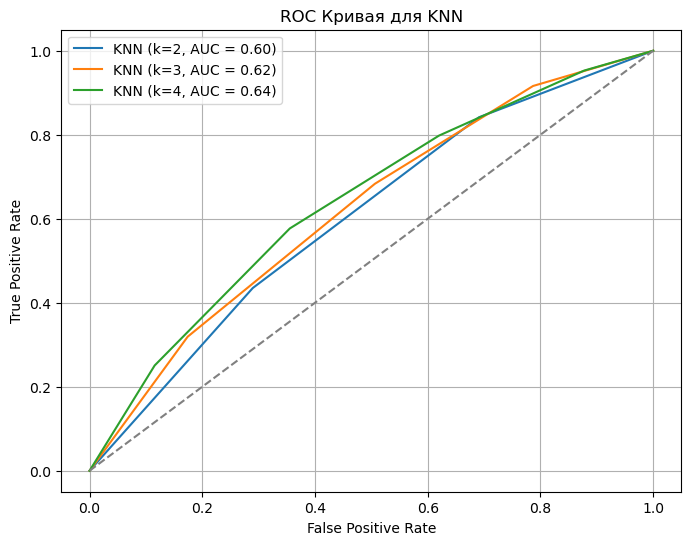

In [36]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, roc_auc_score

knn = KNeighborsClassifier(n_neighbors=4)

k_values = [2, 3, 4]
plt.figure(figsize=(8, 6))

for k in k_values:
    # Инициализация и обучение KNN классификатора
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    # Получение вероятностей для положительного класса
    y_scores = knn.predict_proba(X_test)[:, 1]
    
    # Расчет ROC-кривой и AUC
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = roc_auc_score(y_test, y_scores)
    
    # Построение ROC-кривой
    plt.plot(fpr, tpr, label=f'KNN (k={k}, AUC = {roc_auc:.2f})')

# Добавление диагонали случайного выбора
plt.plot([0, 1], [0, 1], color='grey', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Кривая для KNN')
plt.legend()
plt.grid()
plt.show()

## RandomForest

In [31]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators= 10000, max_depth=2)
clf.fit(X_train, y_train)
y_pred_prob = clf.predict_proba(X_test)[:, 1] 
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=1)


In [32]:
from sklearn.metrics import classification_report, confusion_matrix, RocCurveDisplay
y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.66      0.41      0.51       563
           1       0.69      0.86      0.76       846

    accuracy                           0.68      1409
   macro avg       0.67      0.64      0.64      1409
weighted avg       0.68      0.68      0.66      1409



In [34]:
X_train = pd.DataFrame(X_train, columns = X.columns)

importances = pd.Series(clf.feature_importances_, index=X_train.columns)

importances = importances.sort_values()
importances

Credit card (automatic)      0.003630
Bank transfer (automatic)    0.004380
TotalCharges                 0.106463
Type                         0.114216
Mailed check                 0.159988
Electronic check             0.174265
MonthlyCharges               0.437057
dtype: float64

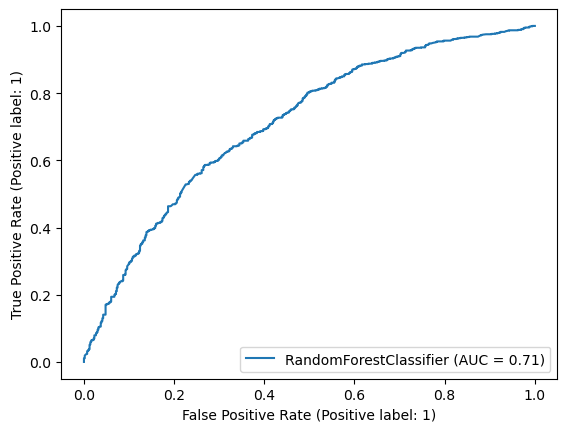

In [35]:
curve = RocCurveDisplay.from_estimator(clf, X_test, y_test)
curve

## AdaBoost

In [49]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

model = AdaBoostClassifier()

# define the grid of values to search
grid = dict()
grid['n_estimators'] = [100, 500, 1000, 5000]
grid['learning_rate'] = [0.0001, 0.001, 0.01, 0.1, 1.0]

# define the evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define the grid search procedure
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy')

# execute the grid search
grid_result = grid_search.fit(X_train, y_train)

# summarize the best score and configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# summarize all scores that were evaluated
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))




Best: 0.688618 using {'learning_rate': 0.001, 'n_estimators': 5000}
0.675601 (0.019111) with: {'learning_rate': 0.0001, 'n_estimators': 100}
0.675778 (0.019146) with: {'learning_rate': 0.0001, 'n_estimators': 500}
0.675778 (0.019146) with: {'learning_rate': 0.0001, 'n_estimators': 1000}
0.676960 (0.019236) with: {'learning_rate': 0.0001, 'n_estimators': 5000}
0.675778 (0.019146) with: {'learning_rate': 0.001, 'n_estimators': 100}
0.676960 (0.019236) with: {'learning_rate': 0.001, 'n_estimators': 500}
0.678558 (0.018749) with: {'learning_rate': 0.001, 'n_estimators': 1000}
0.688618 (0.017770) with: {'learning_rate': 0.001, 'n_estimators': 5000}
0.678973 (0.018899) with: {'learning_rate': 0.01, 'n_estimators': 100}
0.688381 (0.017618) with: {'learning_rate': 0.01, 'n_estimators': 500}
0.687849 (0.018391) with: {'learning_rate': 0.01, 'n_estimators': 1000}
0.688617 (0.018969) with: {'learning_rate': 0.01, 'n_estimators': 5000}
0.687316 (0.018411) with: {'learning_rate': 0.1, 'n_estimators

In [50]:
grid_result.best_estimator_

AdaBoostClassifier(learning_rate=0.001, n_estimators=5000)

In [51]:
ada = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate= 0.01, n_estimators=5000)
ada.fit(X_train, y_train)
ada.score(X_test, y_test)

D:\Anaconda\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


0.5926188786373314

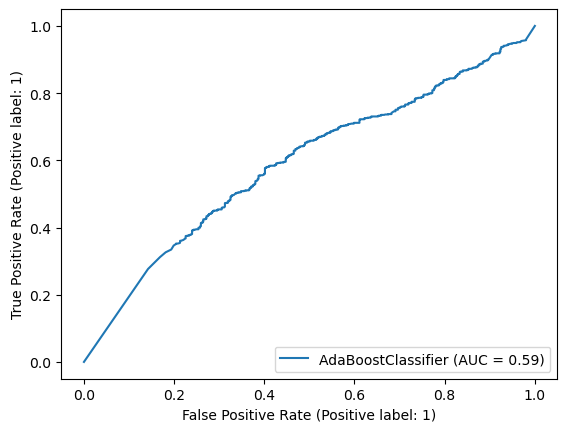

In [52]:
curve = RocCurveDisplay.from_estimator(ada, X_test, y_test)
curve

## SVM

In [54]:
from sklearn.svm import SVC

model = SVC() 


param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
  
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3) 
  
# fitting the model for grid search 
grid.fit(X_train, y_train)
print(grid.best_score_)
grid.best_estimator_

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.688 total time=   0.4s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.679 total time=   0.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.701 total time=   0.4s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.683 total time=   0.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.694 total time=   0.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.698 total time=   0.4s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.681 total time=   0.4s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.705 total time=   0.4s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.690 total time=   0.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.687 total time=   0.4s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.614 total time=   0.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.681 total time=   5.4s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.689 total time=   6.2s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.689 total time=   5.4s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.679 total time=   5.4s
[CV 1/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.691 total time=   1.1s
[CV 2/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.685 total time=   1.3s
[CV 3/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.697 total time=   1.1s
[CV 4/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.688 total time=   1.2s
[CV 5/5] END .....C=1000, gamma=0.1, kernel=rbf;, score=0.683 total time=   1.1s
[CV 1/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.691 total time=   0.5s
[CV 2/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.687 total time=   0.5s
[CV 3/5] END ....C=1000, gamma=0.01, kernel=rbf;, score=0.689 total time=   0.5s
[CV 4/5] END ....C=1000, gam

SVC(C=100, gamma=0.0001)

In [55]:
clf_svc = SVC(C = 100, gamma= 0.0001)
clf_svc.fit(X_train, y_train)
clf_svc.score(X_test, y_test)

0.6827537260468417

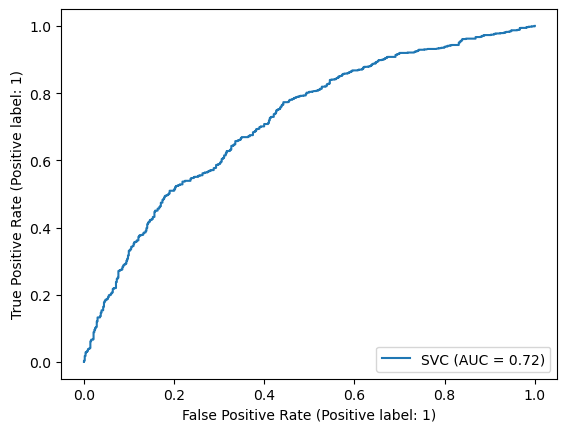

In [56]:
curve = RocCurveDisplay.from_estimator(clf_svc, X_test, y_test)
curve